# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os
import shutil
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#Create API To Kaggle

In [3]:
# Instalar el paquete de kaggle
!pip install kaggle

# Importar las librerías necesarias
import os
import shutil

# Ruta al archivo kaggle.json (modifica esta ruta si el archivo está en otro lugar)
kaggle_json_path = 'C:/Users/gussa/Documents/.kaggle/kaggle.json'

# Verificar si el archivo kaggle.json existe
if os.path.exists(kaggle_json_path):
    # Crear el directorio .kaggle
    os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

    # Copiar el archivo kaggle.json al directorio .kaggle
    shutil.copy(kaggle_json_path, os.path.expanduser('~/.kaggle/kaggle.json'))

    # Cambiar los permisos del archivo kaggle.json
    os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

    # Descargar el dataset
    !kaggle datasets download uciml/breast-cancer-wisconsin-data
else:
    print(f"No se encontró el archivo kaggle.json en la ruta especificada: {kaggle_json_path}")



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!kaggle datasets download uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip breast-cancer-wisconsin-data.zip

"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [6]:
# Instalar el paquete de kaggle
!pip install kaggle

# Importar las librerías necesarias
import os
import shutil
import zipfile

# Ruta al archivo kaggle.json (modifica esta ruta si el archivo está en otro lugar)
kaggle_json_path = 'C:/Users/gussa/Documents/.kaggle/kaggle.json'

# Verificar si el archivo kaggle.json existe
if os.path.exists(kaggle_json_path):
    # Crear el directorio .kaggle
    os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

    # Copiar el archivo kaggle.json al directorio .kaggle
    shutil.copy(kaggle_json_path, os.path.expanduser('~/.kaggle/kaggle.json'))

    # Cambiar los permisos del archivo kaggle.json
    os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

    # Ruta donde se descargará el dataset
    download_dir = 'C:/Users/gussa/Documents/medical/breast_cancer'

    # Descargar el dataset al directorio especificado
    !kaggle datasets download -d uciml/breast-cancer-wisconsin-data -p {download_dir}

    # Ruta completa del archivo descargado
    zip_path = os.path.join(download_dir, 'breast-cancer-wisconsin-data.zip')

    # Descomprimir el archivo descargado
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(download_dir)

    print(f"El dataset se ha descargado y descomprimido en: {download_dir}")
else:
    print(f"No se encontró el archivo kaggle.json en la ruta especificada: {kaggle_json_path}")



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)
El dataset se ha descargado y descomprimido en: C:/Users/gussa/Documents/medical/breast_cancer


In [7]:
df = pd.read_csv('data.csv')

In [8]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# EDA

In [9]:
df.shape

(569, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
df = df.dropna(axis=1)

In [13]:
df.shape

(569, 32)

In [14]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [15]:
df['diagnosis'].value_counts() 

diagnosis
B    357
M    212
Name: count, dtype: int64

C:\Users\gussa\AppData\Local\Temp\ipykernel_5892\14633107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=custom_palette, label='count')


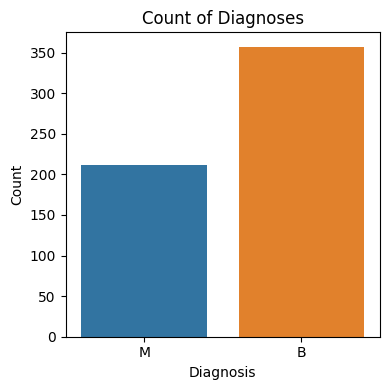

In [16]:
plt.figure(figsize=(4, 4))

custom_palette = ['#1f77b4', '#ff7f0e']  # Lista de colores personalizados
sns.countplot(x='diagnosis', data=df, palette=custom_palette, label='count')

plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Count of Diagnoses')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [17]:
LabelEncoder = LabelEncoder()

In [18]:
#df.iloc[:,1] = LabelEncoder.fit_transform(df.iloc[:,1].values)


In [19]:
df.head(30)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


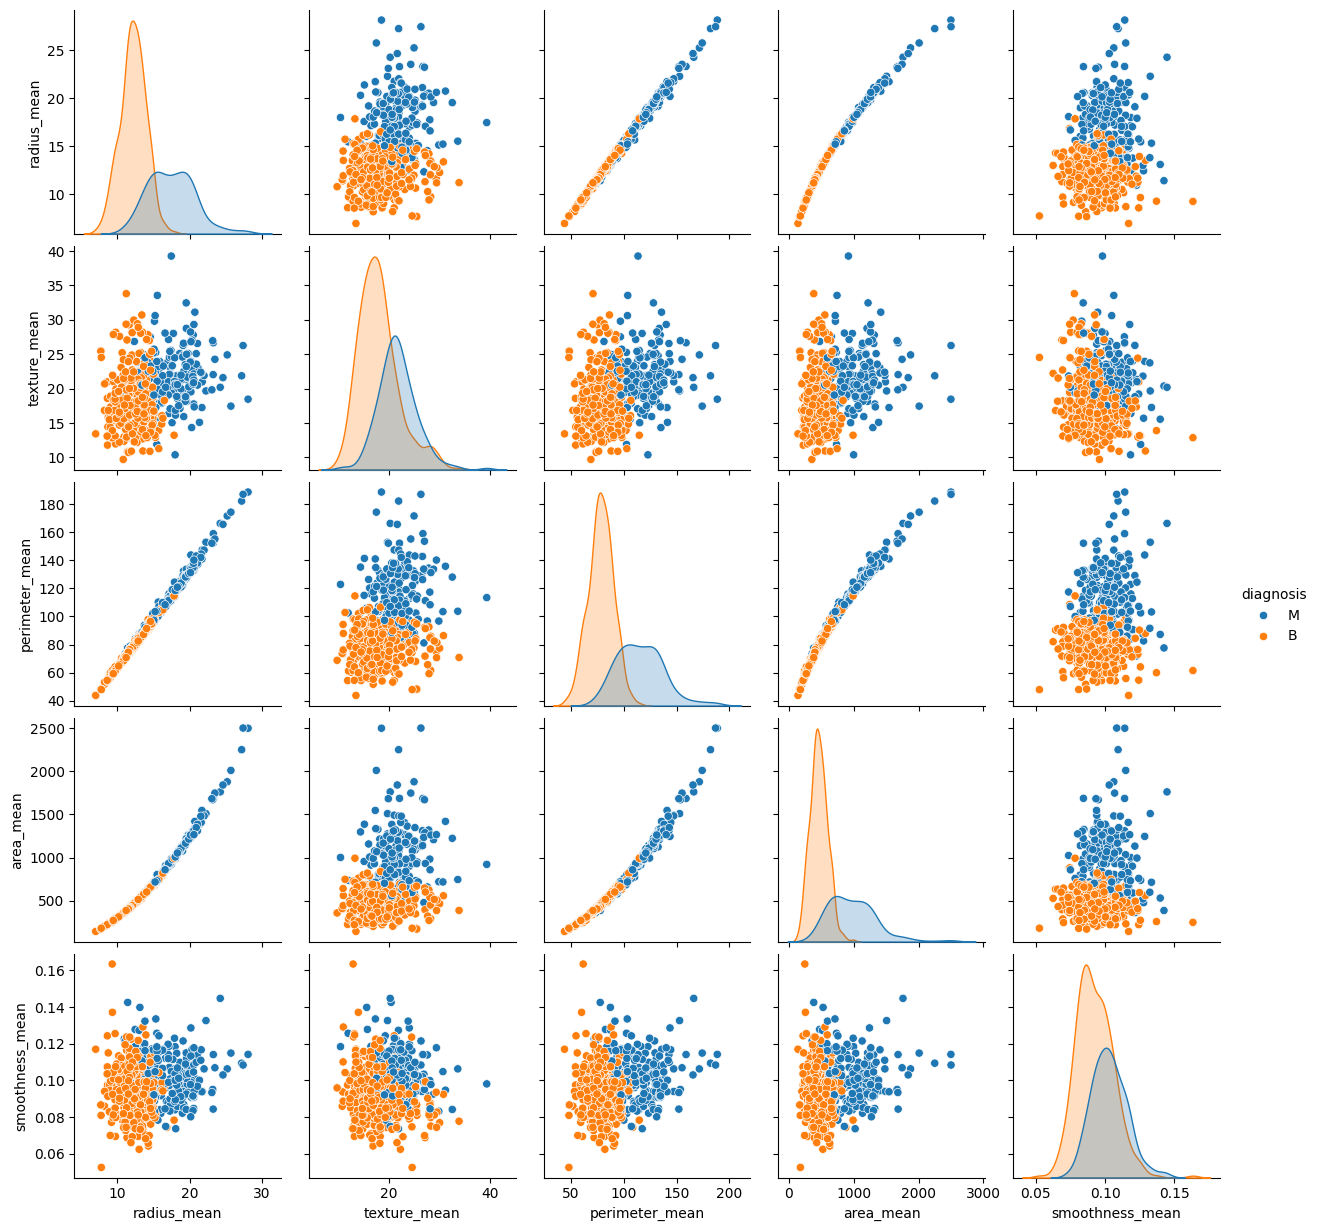

In [20]:
sns.pairplot(df.iloc[:,1:7],hue= 'diagnosis')

In [21]:
#df.iloc[:,0:11].corr()

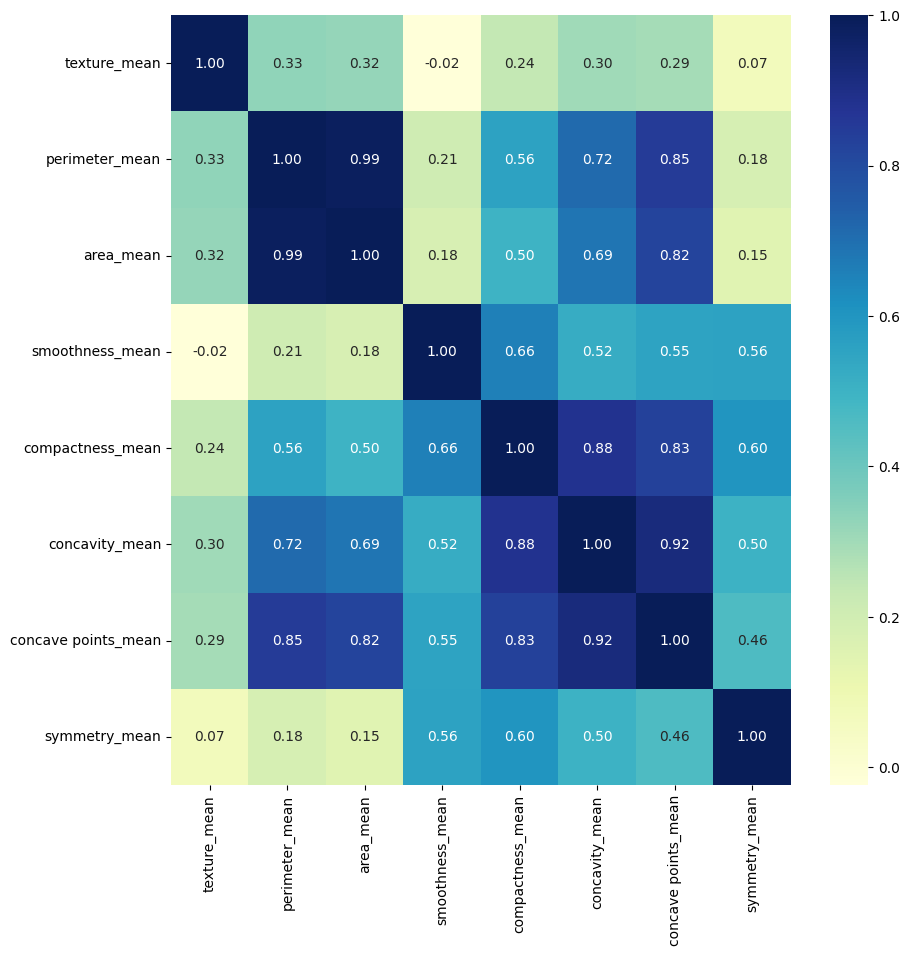

In [22]:
# Crear la figura y ajustar el tamaño
plt.figure(figsize=(10, 10))

# Crear el heatmap con corrección en el colormap y el formato de anotación
sns.heatmap(df.iloc[:, 3:11].corr(), cmap='YlGnBu', annot=True, fmt='.2f')

# Mostrar el gráfico
plt.show()

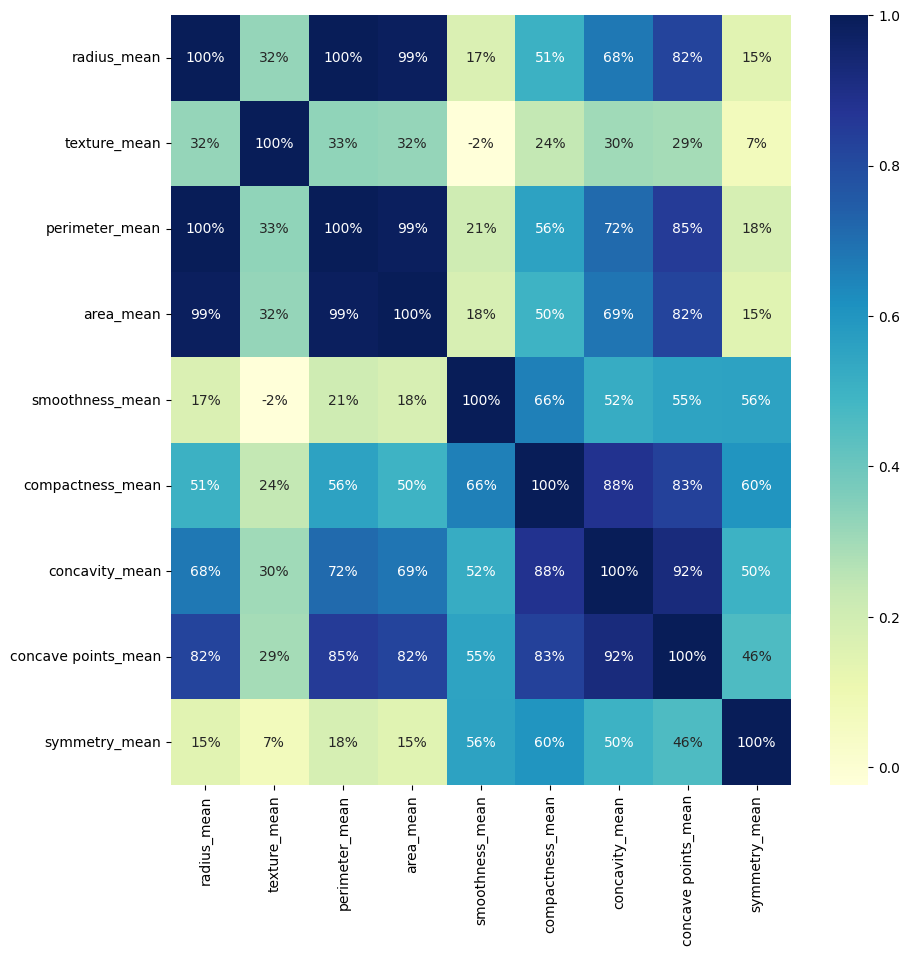

In [23]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.iloc[:, 2:11].corr(), cmap='YlGnBu', annot=True, fmt='.0%')

plt.show()

# SPLIT THE DATASET

In [24]:
X = df.iloc[:,2:31].values
y= df.iloc[:,1].values
y = LabelEncoder.fit_transform(y)

In [25]:
print(X)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]


In [26]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [28]:
print(X_test)

[[1.340e+01 2.052e+01 8.864e+01 ... 5.106e-01 2.051e-01 3.585e-01]
 [1.321e+01 2.525e+01 8.410e+01 ... 1.390e-01 6.005e-02 2.444e-01]
 [1.402e+01 1.566e+01 8.959e+01 ... 6.260e-02 8.216e-02 2.136e-01]
 ...
 [2.018e+01 1.954e+01 1.338e+02 ... 5.308e-01 2.173e-01 3.032e-01]
 [1.831e+01 2.058e+01 1.208e+02 ... 3.759e-01 1.510e-01 3.074e-01]
 [1.504e+01 1.674e+01 9.873e+01 ... 1.856e-01 1.018e-01 2.177e-01]]


In [29]:
sc = StandardScaler()

In [30]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
def models(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    
    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    # Decision Tree
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    # Random Forest
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)

    # Accuracy
    print('Accuracy of Logistic Regression:', log.score(X_train, y_train))
    print('Accuracy of Decision Tree:', tree.score(X_train, y_train))
    print('Accuracy of Random Forest:', forest.score(X_train, y_train))
    
    return log, tree, forest

In [32]:
model = models(X_train, y_train)

Accuracy of Logistic Regression: 0.9912087912087912
Accuracy of Decision Tree: 1.0
Accuracy of Random Forest: 0.9978021978021978


In [33]:
print(f"Type of y: {type(y_train)}")
print(f"First elements of y: {y_train[:5]}")

Type of y: <class 'numpy.ndarray'>
First elements of y: [0 0 0 0 0]


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model[0].predict(X_test))
tp = cm[0][0]
tn = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]
print(cm)
print('Accuracy',(tp+tn)/(tp+tn+fp+fn))


[[65  2]
 [ 3 44]]
Accuracy 0.956140350877193


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model', i)
    print(classification_report(y_test, model[i].predict(X_test)))
    print(accuracy_score(y_test, model[i].predict(X_test)))
    print()


Model 0
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193

Model 1
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

0.9298245614035088

Model 2
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted av

In [ ]:
#Prediction

In [42]:
pred = model[2].predict(X_test)
print('Our Model Prediction: ')
print(pred)
print()
print('Actual Prediction: ')
print(y_test)

Our Model Prediction: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

Actual Prediction: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [43]:
# Make predictions
pred = model[2].predict(X_test)

# Create a DataFrame with both predictions and actual values
results_df = pd.DataFrame({'Prediction': pred, 'Actual': y_test})

print('Combined DataFrame: ')
print(results_df)

Combined DataFrame: 
     Prediction  Actual
0             1       1
1             0       0
2             0       0
3             0       0
4             0       0
..          ...     ...
109           1       1
110           0       0
111           1       1
112           1       1
113           0       0

[114 rows x 2 columns]


In [44]:
# Export the DataFrame to a CSV file
results_df.to_csv('predictions.csv', index=False)